# Capstone 2: COVID-19
## Step 01: Data Wrangling

In this notebook the available data is reviewed and processed to prepare it for the later data analysis steps. All raw data is found in the subfolder data/raw/. Individual sources and characteristics will be given below per data file or source.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score,mean_absolute_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

%matplotlib inline
os.getcwd()

'/Users/lisahw/Documents/Courses and Conferences/DataScience/MyProject/Capstone_02/Springboard/notebooks'

In [96]:
raw_data = '../data/raw/'
int_data = '../data/interim/'

### COVID-19 data 

In [2]:
covid_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-02-2020.csv"
df_covid = pd.read_csv(covid_link)
df_covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-03 02:32:28,34.223334,-82.461707,31,0,0,31,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-03 02:32:28,30.295065,-92.414197,133,10,0,123,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-03 02:32:28,37.767072,-75.632346,353,5,0,348,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-03 02:32:28,43.452658,-116.241552,705,17,0,688,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-03 02:32:28,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2917 non-null   float64
 1   Admin2          2920 non-null   object 
 2   Province_State  3009 non-null   object 
 3   Country_Region  3192 non-null   object 
 4   Last_Update     3192 non-null   object 
 5   Lat             3126 non-null   float64
 6   Long_           3126 non-null   float64
 7   Confirmed       3192 non-null   int64  
 8   Deaths          3192 non-null   int64  
 9   Recovered       3192 non-null   int64  
 10  Active          3192 non-null   int64  
 11  Combined_Key    3192 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 299.4+ KB


In [102]:
df_covid.Country_Region.value_counts().count()

187

The above tells us that we have information on 187 different countries.

Essential information to be retireved from df_covid:
Country/State, Confirmed, Deaths, Recovered, Active
Identified by either the Combined_Key or a self-defined ID based on Province_State and Country_Region


In [109]:
df_base = df_covid.loc[:,['Province_State','Country_Region','Confirmed','Deaths','Recovered','Active','Combined_Key']]
df_base.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Combined_Key
0,South Carolina,US,31,0,0,31,"Abbeville, South Carolina, US"
1,Louisiana,US,133,10,0,123,"Acadia, Louisiana, US"
2,Virginia,US,353,5,0,348,"Accomack, Virginia, US"
3,Idaho,US,705,17,0,688,"Ada, Idaho, US"
4,Iowa,US,1,0,0,1,"Adair, Iowa, US"


In [110]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Province_State  3009 non-null   object
 1   Country_Region  3192 non-null   object
 2   Confirmed       3192 non-null   int64 
 3   Deaths          3192 non-null   int64 
 4   Recovered       3192 non-null   int64 
 5   Active          3192 non-null   int64 
 6   Combined_Key    3192 non-null   object
dtypes: int64(4), object(3)
memory usage: 174.7+ KB


### Population data

In [94]:
population_link = "https://datacenter.prb.org/download/international/indicator/population/csv"

In [97]:
import requests
import csv

myfile = requests.get(population_link,allow_redirects=True)
myfile_content = myfile.content.decode('utf-8')
cr = csv.reader(myfile_content.splitlines(),delimiter=',')
my_list = list(cr)
popfile = csv.writer(open(raw_data+'population.csv','wt'))
for row in my_list[4:]:
    popfile.writerow(row)
df_pop = pd.read_csv(raw_data+'population.csv')
df_pop.head()    


,FIPS,Name,Type,TimeFrame,Data
0,WORLD,WORLD,World,2019,7691.463
1,AFRICA,AFRICA,Sub-Region,2019,1305.215
2,NORTHERN AFRICA,NORTHERN AFRICA,Sub-Region,2019,239.895
3,DZ,Algeria,Country,2019,43.406
4,EG,Egypt,Country,2019,99.064


In [106]:
print(sum(df_pop.Type=='Country'),len(df_pop.Type))

208 233


In [152]:
df_pop.TimeFrame.unique()

array([2019])

The above tells us that we have information on 208 countries, more than in the COVID-19 dataset.

In [98]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FIPS       232 non-null    object 
 1   Name       233 non-null    object 
 2   Type       233 non-null    object 
 3   TimeFrame  233 non-null    int64  
 4   Data       233 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 9.2+ KB


Essential for our analysis will be the Data (population) combined with the Name.

In [129]:
df_pop.rename(columns={'Data':'Population'},inplace=True)

#### Merge datasets

In [131]:
df_test = pd.merge(left=df_base,right=df_pop.loc[:,['Name','Population']],left_on='Country_Region',right_on='Name')

In [132]:
df_test.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Combined_Key,Name,Population
0,Alberta,Canada,5670,94,0,5576,"Alberta, Canada",Canada,37.413
1,British Columbia,Canada,2171,114,0,2057,"British Columbia, Canada",Canada,37.413
2,Diamond Princess,Canada,1,1,0,0,"Diamond Princess, Canada",Canada,37.413
3,Grand Princess,Canada,13,0,0,13,"Grand Princess, Canada",Canada,37.413
4,Manitoba,Canada,282,6,0,276,"Manitoba, Canada",Canada,37.413


In [133]:
df_test.drop(['Name'],axis=1,inplace=True)

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Combined_Key,Population
0,Alberta,Canada,5670,94,0,5576,"Alberta, Canada",37.413
1,British Columbia,Canada,2171,114,0,2057,"British Columbia, Canada",37.413
2,Diamond Princess,Canada,1,1,0,0,"Diamond Princess, Canada",37.413
3,Grand Princess,Canada,13,0,0,13,"Grand Princess, Canada",37.413
4,Manitoba,Canada,282,6,0,276,"Manitoba, Canada",37.413
...,...,...,...,...,...,...,...,...
247,NaN,Vietnam,270,0,219,51,Vietnam,95.656
248,NaN,Western Sahara,6,0,5,1,Western Sahara,0.582
249,NaN,Yemen,10,2,1,7,Yemen,29.162
250,NaN,Zambia,119,3,75,41,Zambia,17.861


In [184]:
df_test.rename(columns={'Country_Region':'Country'},inplace=True)

### Cardiovascular Death Rate

In [135]:
cardio_file = raw_data + 'cardiovascular-death-rate-vs-gdp-per-capita.csv'
# Source: https://ourworldindata.org/grapher/cardiovascular-death-rate-vs-gdp-per-capita
df_cardio = pd.read_csv(cardio_file)
df_cardio.head()

,Entity,Code,Year,"Cardiovascular disease death rate (per 100,000) (Rate)","GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0
3,Afghanistan,AFG,1913,NaN,NaN,5730000.0
4,Afghanistan,AFG,1950,NaN,NaN,8151455.0


In [151]:
df_cardio[df_cardio.Entity=='Afghanistan']

,Entity,Code,Year,"Cardiovascular disease death rate (per 100,000) (Rate)","GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0
3,Afghanistan,AFG,1913,NaN,NaN,5730000.0
4,Afghanistan,AFG,1950,NaN,NaN,8151455.0
...,...,...,...,...,...,...
67,Afghanistan,AFG,2013,626.162149,1848.700026,34499915.0
68,Afghanistan,AFG,2014,616.669379,1838.960244,NaN
69,Afghanistan,AFG,2015,608.301518,1809.016488,NaN
70,Afghanistan,AFG,2016,601.511737,1802.695565,NaN


In [161]:
df_cardio.rename(columns={df_cardio.columns[3]:'Cardio Death Rate'},inplace=True)
df_cardio = df_cardio.loc[:,['Entity','Year','Cardio Death Rate']]
df_cardio.head()


,Entity,Year,Cardio Death Rate
0,Afghanistan,1800,NaN
1,Afghanistan,1820,NaN
2,Afghanistan,1870,NaN
3,Afghanistan,1913,NaN
4,Afghanistan,1950,NaN


In [177]:
def extract_recent(df):
    df.dropna()
    return [list(df['Cardio Death Rate'].loc[df.Year == df.Year.max()])[0],df.Year.max()]
cardio = []
for country in df_cardio.Entity.unique():
    cardio.append(np.hstack((country,extract_recent(df_cardio[df_cardio.Entity==country]))))


In [178]:
df_cardio_2 = pd.DataFrame(cardio)
df_cardio_2.rename(columns={0:'Country',1:'Cardio Death Rate',2:'Cardio Year'},inplace=True)
df_cardio_2.head()


,Country,Cardio Death Rate,Cardio Year
0,Afghanistan,597.0293320369332,2017.0
1,Albania,304.1954064017878,2017.0
2,Algeria,278.36387712753714,2017.0
3,American Samoa,283.7503666306692,2017.0
4,Andean Latin America,116.85012926340202,2017.0


#### Merge datasets

In [186]:
df_test_2 = pd.merge(left=df_test,right=df_cardio_2,on='Country')
df_test_2.head()

,Province_State,Country,Confirmed,Deaths,Recovered,Active,Combined_Key,Name,Population,Cardio Death Rate,Cardio Year
0,Alberta,Canada,5670,94,0,5576,"Alberta, Canada",Canada,37.413,105.59928037491925,2017.0
1,British Columbia,Canada,2171,114,0,2057,"British Columbia, Canada",Canada,37.413,105.59928037491925,2017.0
2,Diamond Princess,Canada,1,1,0,0,"Diamond Princess, Canada",Canada,37.413,105.59928037491925,2017.0
3,Grand Princess,Canada,13,0,0,13,"Grand Princess, Canada",Canada,37.413,105.59928037491925,2017.0
4,Manitoba,Canada,282,6,0,276,"Manitoba, Canada",Canada,37.413,105.59928037491925,2017.0


In [187]:
df_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Province_State     82 non-null     object 
 1   Country            248 non-null    object 
 2   Confirmed          248 non-null    int64  
 3   Deaths             248 non-null    int64  
 4   Recovered          248 non-null    int64  
 5   Active             248 non-null    int64  
 6   Combined_Key       248 non-null    object 
 7   Name               248 non-null    object 
 8   Population         248 non-null    float64
 9   Cardio Death Rate  248 non-null    object 
 10  Cardio Year        248 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 23.2+ KB


### Diabetes

In [188]:
diabetes_file = raw_data + 'diabetes-prevalence.csv'
# Source: https://ourworldindata.org/grapher/diabetes-prevalence
df_diab = pd.read_csv(diabetes_file)
df_diab.head()

,Entity,Code,Year,Diabetes prevalence (% of population ages 20 to 79) (% of population ages 20 to 79)
0,Afghanistan,AFG,2017,9.59
1,Albania,ALB,2017,10.08
2,Algeria,DZA,2017,6.73
3,Andorra,AND,2017,7.97
4,Angola,AGO,2017,3.94


In [193]:
df_diab.Year.unique()

array([2017])

In [189]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 4 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Entity                                                                               253 non-null    object 
 1   Code                                                                                 207 non-null    object 
 2   Year                                                                                 253 non-null    int64  
 3   Diabetes prevalence (% of population ages 20 to 79) (% of population ages 20 to 79)  253 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.0+ KB


#### Merge datasets

In [192]:
df_diab.rename(columns={'Entity':'Country',df_diab.columns[-1]:'Diabetes Percentage'},inplace = True)
df_test_3 = pd.merge(left=df_test_2,right=df_diab.loc[:,['Country','Diabetes Percentage']],on='Country')
df_test_3.head()

,Province_State,Country,Confirmed,Deaths,Recovered,Active,Combined_Key,Name,Population,Cardio Death Rate,Cardio Year,Diabetes Percentage
0,Alberta,Canada,5670,94,0,5576,"Alberta, Canada",Canada,37.413,105.59928037491925,2017.0,7.37
1,British Columbia,Canada,2171,114,0,2057,"British Columbia, Canada",Canada,37.413,105.59928037491925,2017.0,7.37
2,Diamond Princess,Canada,1,1,0,0,"Diamond Princess, Canada",Canada,37.413,105.59928037491925,2017.0,7.37
3,Grand Princess,Canada,13,0,0,13,"Grand Princess, Canada",Canada,37.413,105.59928037491925,2017.0,7.37
4,Manitoba,Canada,282,6,0,276,"Manitoba, Canada",Canada,37.413,105.59928037491925,2017.0,7.37


### Obesity

In [194]:
obesity_file = raw_data + 'Food_Supply_Quantity_kg_Data.csv'
# Source: https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset
df_obe = pd.read_csv(obesity_file)
df_obe.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.006490,0.000189,0.000870,0.005431,38042000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.027607,0.001085,0.018160,0.008362,2858000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.009895,0.001057,0.004313,0.004525,43406000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.000111,0.000006,0.000035,0.000070,31427000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.025773,0.003093,0.015464,0.007216,97000.0,%


#### Merge datasets

In [195]:
df_test_4 = pd.merge(left=df_test_3,right=df_obe.loc[:,['Country','Obesity','Undernourished']],on='Country')
df_test_4.head()

,Province_State,Country,Confirmed,Deaths,Recovered,Active,Combined_Key,Name,Population,Cardio Death Rate,Cardio Year,Diabetes Percentage,Obesity,Undernourished
0,Alberta,Canada,5670,94,0,5576,"Alberta, Canada",Canada,37.413,105.59928037491925,2017.0,7.37,31.3,<2.5
1,British Columbia,Canada,2171,114,0,2057,"British Columbia, Canada",Canada,37.413,105.59928037491925,2017.0,7.37,31.3,<2.5
2,Diamond Princess,Canada,1,1,0,0,"Diamond Princess, Canada",Canada,37.413,105.59928037491925,2017.0,7.37,31.3,<2.5
3,Grand Princess,Canada,13,0,0,13,"Grand Princess, Canada",Canada,37.413,105.59928037491925,2017.0,7.37,31.3,<2.5
4,Manitoba,Canada,282,6,0,276,"Manitoba, Canada",Canada,37.413,105.59928037491925,2017.0,7.37,31.3,<2.5


### Age Groups

In [196]:
age_file = raw_data + 'WPP2019_PopulationByAgeSex_Medium.csv'
# Source: https://population.un.org/wpp/Download/Standard/CSV/
df_age = pd.read_csv(age_file)
df_age.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,4,Afghanistan,2,Medium,1950,1950.5,0-4,0,5,630.044,661.578,1291.622
1,4,Afghanistan,2,Medium,1950,1950.5,5-9,5,5,516.206,487.335,1003.541
2,4,Afghanistan,2,Medium,1950,1950.5,10-14,10,5,461.378,423.326,884.704
3,4,Afghanistan,2,Medium,1950,1950.5,15-19,15,5,414.369,369.363,783.732
4,4,Afghanistan,2,Medium,1950,1950.5,20-24,20,5,374.109,318.392,692.501


In [199]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404753 entries, 0 to 1404752
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   LocID        1404753 non-null  int64  
 1   Location     1404753 non-null  object 
 2   VarID        1404753 non-null  int64  
 3   Variant      1404753 non-null  object 
 4   Time         1404753 non-null  int64  
 5   MidPeriod    1404753 non-null  float64
 6   AgeGrp       1404753 non-null  object 
 7   AgeGrpStart  1404753 non-null  int64  
 8   AgeGrpSpan   1404753 non-null  int64  
 9   PopMale      1404753 non-null  float64
 10  PopFemale    1404753 non-null  float64
 11  PopTotal     1404753 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 128.6+ MB


In [198]:
df_age[(df_age.Location=='Afghanistan')&(df_age.Time==2019)]

,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
1449,4,Afghanistan,2,Medium,2019,2019.5,0-4,0,5,2891.330,2747.452,5638.782
1450,4,Afghanistan,2,Medium,2019,2019.5,5-9,5,5,2765.393,2636.519,5401.912
1451,4,Afghanistan,2,Medium,2019,2019.5,10-14,10,5,2614.937,2501.560,5116.497
1452,4,Afghanistan,2,Medium,2019,2019.5,15-19,15,5,2321.520,2197.654,4519.174
1453,4,Afghanistan,2,Medium,2019,2019.5,20-24,20,5,1950.650,1843.985,3794.635
1454,4,Afghanistan,2,Medium,2019,2019.5,25-29,25,5,1551.332,1433.056,2984.388
1455,4,Afghanistan,2,Medium,2019,2019.5,30-34,30,5,1255.855,1138.037,2393.892
1456,4,Afghanistan,2,Medium,2019,2019.5,35-39,35,5,1033.269,954.327,1987.596
1457,4,Afghanistan,2,Medium,2019,2019.5,40-44,40,5,834.402,758.533,1592.935
1458,4,Afghanistan,2,Medium,2019,2019.5,45-49,45,5,649.695,603.870,1253.565


In [260]:
def cluster_agegroup(df):
    bool_age = (df.AgeGrp=='75-79')|(df.AgeGrp=='80-84')|(df.AgeGrp=='85-89')|(df.AgeGrp=='90-94')|(df.AgeGrp=='95-99')|(df.AgeGrp=='100+')
    df2 = df.loc[:,['PopMale','PopFemale','PopTotal']]
    age75plus = df2[bool_age].agg(sum)/df2.PopTotal.agg(sum)*100
    age75plus = age75plus.append(pd.Series({'Total Population':df2.PopTotal.agg(sum)}))
    return age75plus

In [272]:
df_t = pd.DataFrame()
for country in df_age.Location.unique():
    df_tt = cluster_agegroup(df_age[df_age.Location==country])
    df_tt['Country'] = country
    df_tt = pd.DataFrame(df_tt).transpose()
    df_t=pd.concat([df_t,df_tt])
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 0
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PopMale           440 non-null    object
 1   PopFemale         440 non-null    object
 2   PopTotal          440 non-null    object
 3   Total Population  440 non-null    object
 4   Country           440 non-null    object
dtypes: object(5)
memory usage: 20.6+ KB


#### Merge datasets

In [273]:
df_test_5 = pd.merge(left=df_test_4,right=df_t,on='Country')
df_test_5.head()

,Province_State,Country,Confirmed,Deaths,Recovered,Active,Combined_Key,Name,Population,Cardio Death Rate,Cardio Year,Diabetes Percentage,Obesity,Undernourished,PopMale,PopFemale,PopTotal,Total Population
0,Alberta,Canada,5670,94,0,5576,"Alberta, Canada",Canada,37.413,105.59928037491925,2017.0,7.37,31.3,<2.5,5.30683,6.42342,11.7303,5.67253e+06
1,British Columbia,Canada,2171,114,0,2057,"British Columbia, Canada",Canada,37.413,105.59928037491925,2017.0,7.37,31.3,<2.5,5.30683,6.42342,11.7303,5.67253e+06
2,Diamond Princess,Canada,1,1,0,0,"Diamond Princess, Canada",Canada,37.413,105.59928037491925,2017.0,7.37,31.3,<2.5,5.30683,6.42342,11.7303,5.67253e+06
3,Grand Princess,Canada,13,0,0,13,"Grand Princess, Canada",Canada,37.413,105.59928037491925,2017.0,7.37,31.3,<2.5,5.30683,6.42342,11.7303,5.67253e+06
4,Manitoba,Canada,282,6,0,276,"Manitoba, Canada",Canada,37.413,105.59928037491925,2017.0,7.37,31.3,<2.5,5.30683,6.42342,11.7303,5.67253e+06


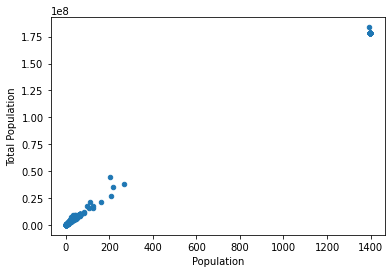

In [271]:
df_test_5.plot(kind='scatter',x='Population',y='Total Population')

## TO-DO:
The population data does not agree yet: population is in 1000s and needs to be compared to Total Population.

Cardio Death Rate is per 100.000 people. Needs to be turned into percentage.

COVID Data needs to be grouped by Country.